# Chunking using custom syntactic rules to extract meaningful descriptions


In [16]:
import nltk
import pandas as pd
import numpy as np
import unicodedata

# Read in corpus

In [2]:
from nltk.tokenize import word_tokenize

filename= "C:\\Users\\Tayla\\Documents\\2nd Semester 2020\\Final Project\\10.Oct.Method\\Myocardial\\Myo_all_clean.txt"
      
with open(filename,'r',encoding='utf-8') as file:
    corp=file.readlines()

texts = []
for sentence in corp:
    texts.append(sentence)
print(texts.index("Ya but he is struggling to breathe bebecause he is having a problem with the heart now he is struggling to breathe\n"))
#print(texts)

61


# Splitting text into POS

In [3]:
tagged =[]
for sentence in texts:
# POS tagging with nltk
    nltk_pos_tagged = nltk.pos_tag(sentence.split())
    tagged.append(nltk_pos_tagged)

print(len(tagged))

data_frame = pd.DataFrame(tagged)
#data_frame

414


# Chunking according to rules set 

Example: 
Sentence from corpus: Ya but he is struggling to breathe bebecause he is having a problem with the heart now he is struggling to breathe

Syntax tree: 


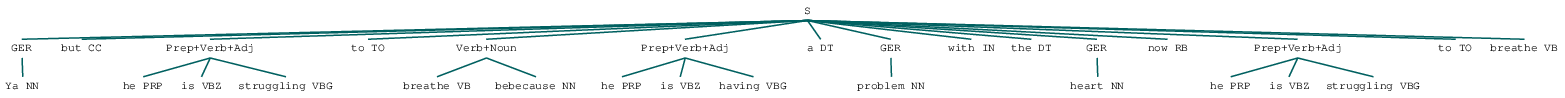

In [9]:

# Grammar Rules

grammar =  """ Prep+Verb+Adj:  {<PRP|DT|NN>?<VB.*|MD><VB.*|JJ*>}
             Verb+Adverb/Adj:  {<VB.*|MD><RB|JJ|VB.?><VB.*|JJ*>}
                   Verb+Noun:  {<VB.*><NN.*>} 
                   PRP+VB+CC: {<PRP|WP><VB.*><.*>*<CC*>}
                      Adj+NN: {<JJ><NN.*>}
                         GER: {<VBG|NN>}
                    NEGATION: {<RB><JJ|VB.*>}"""
# NEGATION2: {<PRP><VB.*><NN>}
#Verb+Adverb/Adj:  {<VB.*><RB><JJ.*|VB.?>}
#PRP+VB+CC: {<PRP|WP><VB.*><.*>*<CC*>}
tagged_rule =[]
trees = []
chunk_trees = []
for index,sentence in enumerate(texts):
# POS tagging with nltk
    nltk_pos_tagged = nltk.pos_tag(sentence.split())
    tagged_rule.append(nltk_pos_tagged)
    
for each in range(len(tagged_rule)):
    cp = nltk.RegexpParser(grammar)
    chunk_trees.append(cp.parse(tagged_rule[each]))
    
    
data_frame_rule=pd.DataFrame(tagged_rule)



print('Example: ')
number_line = 61
print("Sentence from corpus: "+texts[number_line])

data_frame_rule 
print('Syntax tree: ')
display(chunk_trees[number_line])

In [10]:

NP = []
VP = []
PP = []
DN = []
NG = []
IN=[]
NN=[]
N2=[]

def getNodes(parent):
    for node in parent:
        if type(node) is nltk.Tree:
                
            if node.label() == 'Prep+Verb+Adj': 
                NP.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("NP: Sentence:", " ".join(node.leaves()))
                
            if node.label() == 'Verb+Adverb/Adj':
                VP.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("VP: Sentence:", " ".join(node.leaves()))
                
            if node.label() == 'Verb+Noun':
                PP.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("PP: Sentence:", " ".join(node.leaves()))
            if node.label() == 'PRP+VB+CC':
                DN.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("PP: Sentence:", " ".join(node.leaves()))
            if node.label() == 'Adj+NN':
                NG.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("PP: Sentence:", " ".join(node.leaves()))
            if node.label() == 'GER':
                IN.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("PP: Sentence:", " ".join(node.leaves()))
            if node.label() == 'NEGATION1' or 'NEEGATION2':
                NN.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("PP: Sentence:", " ".join(node.leaves()))
            if node.label() == 'NEGATION3':
                N2.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("PP: Sentence:", " ".join(node.leaves()))

            getNodes(node)
        

In [11]:
for chunked in range(len(chunk_trees)):
    getNodes(chunk_trees[chunked])

In [12]:
print(texts[number_line])

NP_dataframe = pd.DataFrame(NP,  columns=['Prep+Verb+Adj'])
#NP_dataframe

VP_dataframe = pd.DataFrame(VP, columns=['Verb+Adverb/Adj'])
#VP_dataframe


PP_dataframe = pd.DataFrame(PP, columns=['Adj+Noun'])
#PP_dataframe


DN_dataframe = pd.DataFrame(DN, columns=['PRP+VB+CC'])
#DN_dataframe[0:30]

NG_dataframe = pd.DataFrame(NG, columns=['Adj+NN'])
#NG_dataframe[0:60]


IN_dataframe = pd.DataFrame(IN, columns=['GER'])
#IN_dataframe


NN_dataframe = pd.DataFrame(NN, columns=['Negation symptom-Noun'])
#IN_dataframe


N2_dataframe = pd.DataFrame(N2, columns=['Negation symptom-Adj'])
#IN_dataframe

Ya but he is struggling to breathe bebecause he is having a problem with the heart now he is struggling to breathe



In [13]:
# Place the DataFrames side by side
horizontal_stack = pd.concat([NP_dataframe, VP_dataframe,PP_dataframe,DN_dataframe,NG_dataframe,IN_dataframe,NN_dataframe,N2_dataframe], axis=1)
print('Sepsis meaningful sentences:')
horizontal_stack[0:50]

Sepsis meaningful sentences:


,Prep+Verb+Adj,Verb+Adverb/Adj,Adj+Noun,PRP+VB+CC,Adj+NN,GER,Negation symptom-Noun,Negation symptom-Adj
0,he is lying,do not know,is Mrs,it is just the third time he is going to hospi...,alright thank,ambulance,is Mrs,NaN
1,he is going,do not know,speaking please,it is on the telephone connected on the teleph...,good day,husband,speaking please,NaN
2,they cannot find,am urgently trying,¦ hospital,He is but he is not cooperative and,only nber,home,ambulance,NaN
3,is wrong,is not cooperative,cannot walk,it is a plot and,young man,pardon,husband,NaN
4,he is got,do not know,come pick,she is on Remedi Medical aid we think she may ...,good mood,Yes,home,NaN
5,having chronical,is not happy,is Discovery,I know she has a history of high blood pressur...,mom- Hello,bed,¦ hospital,NaN
6,that is right,are not feeling,breathe bebecause,it is the corner of ¦ and,good day,nber,pardon,NaN
7,they must push,is very nauseous,breathe bebecause,he is awake now but he had very pain and his a...,high blood,everything,Yes,NaN
8,one will answer,would just like,has heart,we are on the R ¦ between Vereeniging and,high blood,¦,he is lying,NaN
9,I will ask,had very pain,have everything,he is on an oxygen machine on a full time basi...,¦ flats,gate,bed,NaN


In [14]:
# Combining the meaningful sentences into one array
combined_sepsis = []

for sen in NP:
    combined_sepsis.append(sen)
    
for sen in VP:
    combined_sepsis.append(sen)

for sen in PP:
    combined_sepsis.append(sen)
    
for sen in DN:
    combined_sepsis.append(sen)

#Removing "do not know" sentence from array
while "do not know" in combined_sepsis: combined_sepsis.remove("do not know")
while "" in combined_sepsis: combined_sepsis.remove("")
#print(combined_sepsis)


# Convert to ASCII characters.

In [18]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text



removed_meaningful_sepsis = []
for word in combined_sepsis:
    removed_meaningful_sepsis.append(remove_accented_chars(word))
#print(removed_meaningful_sepsis)

# Write 'meaningful' sentences to a txt file (for augmentation)

In [19]:
#numpy_array = NP_dataframe['Description'].to_numpy()
#np.savetxt(r"C:\Users\Tayla\Documents\2nd Semester 2020\Final Project\10.Oct.Method\Sepsis\Sepsis_meaningful.txt", numpy_array)


tfile = open("C:\\Users\\Tayla\\Documents\\2nd Semester 2020\\Final Project\\10.Oct.Method\\Myocardial\\Myo_meaningful.txt", 'a')
for each in range(len(removed_meaningful_sepsis)):
    tfile.writelines(removed_meaningful_sepsis[each]+'\n')
tfile.close()

# Creating 'file' format for classification model

In [20]:
tfile = open("C:\\Users\\Tayla\\Documents\\2nd Semester 2020\\Final Project\\10.Oct.Method\\Myocardial\\Myo_meaningful",encoding= 'utf-8', 'a')
for each in range(len(removed_meaningful_sepsis)):
    tfile.writelines(removed_meaningful_sepsis[each]+'\n')
tfile.close()

SyntaxError: positional argument follows keyword argument (<ipython-input-20-621fb415f549>, line 1)